## Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил студент гр. 9381 Аухадиев Александр.

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Теоретические положения

### Бинарный метод

Бинарный метод является одним из методов быстрого возведения числа в степень $n \in N$. Степень представляется в двоичной системе счисления, старший бит отбрасывается, после чего просматриваются все биты и, если бит равен нулю, текущее число возводится в квадрат, а если бит равен единице, то дополнительно текущее число умножается на исходное число. Количество умножений рассчитывается по следующей формуле: $\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2 n \rceil, \nu(n)$ - количество единиц в двоичной записи числа.

### Метод множителей

Метод множителей является одним из методов быстрого возведения числа в необходимую степень $n \in N$. Показатель степени рассматривается как произведение двух простых чисел $n=k \cdot m$, и текущее число возводится сначала в степень $k$, затем, уже возведённое в $k$, возводится в степень $m$. Для простого числа алгоритм возводит число в степень $n-1$, а потом умножает на исходное. Таким образом можно получить результат лучше, чем бинарным методом. Метод множителей оптимален при $n = 15$, а при $n <= 14$ даёт такой же результат, что и бинарный метод.

### Определение аддитивной цепочки

Аддитивной цепочкой для $n \in N$ называется последовательность $1=a_1, a_2, a_3, \dots, a_m=n$, где $a_i=a_j+a_k$, $k\leq j<i$ $\forall i=1..m$

$l(n)=m$ - минимальная аддитивная цепочка

Для $n \leq 1000$ справедлива следующая рекуретная формула:
$$
l(n) = min\{l(n - 1) + 1, l_n\} - \sigma_n \\
l_p= \begin{cases} \infty,\ если\ p -\ простое \\ l(q)+l(^p/_q),\ если\ q -\ минимальный\ простой\ делитель\ p \end{cases}\\
\sigma_n = {0,1}
$$
Для $\sigma_n$ нет формулы, для чисел меньших 200 $\sigma_n$ равняется единице при следующих значениях: $23, 43, 59, 77, 83, 107, 149, 163, 165, 179, 203$

### Теорема Брауэра

Теорема Брауэра.

При некотором $k < log_2 log_2 n => l(n)<(1+k^{-1}) \cdot \lceil log_2 n \rceil + 2^{k-1}-k+2$

Если положить $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, то можно получить следующие следствия:

Следствие 1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$

Следствие 2: Наилучшая верхняя оценка для длины аддитивной цепочки: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$


### Звездная цепочка. Гипотеза Шольца-Брауэра

Звездная цепочка - это аддитивная цепочка, в которой каждый элемент получен при помощи сложения предыдущего и какого-то ещё: $a_i=a_{i-1}+a_k$, где $0 \leq k \leq i-1$

$l^*(n)$ - минимальная звездная цепочка. Очевидно, что $l^*(n) \geq l(n)$

Гипотеза Шольца-Брауэра: $l^*(2^n-1) \geq l^*(n)+n-1$

### Алгоритм дробления индексов

Алгоритм дробления индексов находит минимальную звездную цепочку для числа $n$.

Введём опредление вектора индексов. Вектором индексов аддитивной цепочки называется последовательность $\{ r_i \}_{i=1}^{m}$, где $r_i = {x: 1 \leq x \leq i}$, такая то $a_i = a_{i-1} + a_{r_i}, \, i=2..m$

Наибольшая звездная цепочка: $S_{max}=\{1, 2, 4, \dots, 2^m\} <=> r_{max} = \{1, 2, 3, \dots, m\}$
Наименьшая звездная цепочка: $S_{min}=\{1,2,3,\dots , m\} <=> r_{min}=\{1, 1, 1, \dots, 1\}$

Будем считать, что $r=\{ r_i \}_{i=1}^{m}$ больше $\tilde{r}=\{ \tilde{r}_i \}_{i=1}^{m}$ если $r_1=\tilde{r}_1; r_2=\tilde{r}_2; \dots; r_{i-1}=\tilde{r}_{i-1};r_i>\tilde{r}_i$

Нахождение минимальной аддитивной цепочки является переборной задачей. Для начала будем каждый вектор индексов разбивать на два: $r=\{ r_i \}_{i=1}^{q}$ - фиксированный вектор, $\rho=\{ \rho_j \}_{j=q+1}^{m}$ - меняющийся вектор. Заметим, что для фиксированного вектора можно вычислить максимальное и минимальное значение аддитивной цепочки:
$$
a_{max}: \{ r_i \}_{i=1}^{q} \cup \{ q+1, q+2, \dots, m \} => a_{max} = a_{q+1} \cdot 2^{m-q}\\
a_{min}: \{ r_i \}_{i=1}^{q} \cup \{ 1, 1, \dots, 1 \} => a_{min}=a_{q+1}+m-q
$$

Алгоритм перебора будет заключаться в следующем: текущий вектор индексов разбивается по середине на фиксированный и изменющийся. Берётся фиксированная часть, вычисляются $a_{max}$ и $a_{min}$. Если $n \notin [a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору(в сторону уменьшения или увеличения). Если $n$ попало в данный промежуток, то осуществляется перебор по меняющемуся вектору. Если для заданной длины не нашлось аддитивной цепочки, то увеличить длину аддитивной цепочки. Длина аддитивной цепочки $m \in [\underline{l}(n), \overline{l}(n)]$, где $\underline{l}(n)=\lceil log_2 n \rceil,\, \overline{l}(n)=\lambda(n)+\nu(n)-1$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

1. Применить бинарный метод и метод множителей для $x^n$,где $n \geq 30$, для 2-3 значений $n$(значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n \geq 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. _Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность_


## Выполнение работы

### 1. Бинарный метод и метод множителей
Реализация бинарного метода:

In [3]:
def binary_method(x, pow):
    bin_pow = bin(pow)[3:]
    count_of_mul = 0
    orig_x = x
    for bit in bin_pow:
        if bit == '0':
            x *= x
            count_of_mul += 1
        else:
            x *= x
            x *= orig_x
            count_of_mul += 2
    return x, count_of_mul

def multiplier_method(x, pow):
    multipliers = []
    for f in list(factor(pow)):
        for i in range(f[1]):
            multipliers.append(f[0])
    count_of_mul = 0
    cur_base_x = x
    for mul in multipliers:
        if mul <= 13:
            x, count_bin = binary_method(x, mul)
            count_of_mul += count_bin
            cur_base_x = x
        else:
            x, count_mm = multiplier_method(x, mul - 1)
            x *= cur_base_x
            count_of_mul += count_mm + 1
            cur_base_x = x
    return x, count_of_mul

if __name__ == "__main__":
    x = int(input("Введите X: "))
    pow = int(input("Введите степень: "))
    print(f"{x} в степени {pow} после возведения в квадрат напрямую = {x**pow}")
    x_in_pow, count_opers = binary_method(x, pow)
    print(f"{x} в степени {pow} бинарным методом = {x_in_pow}, количество операций = {count_opers}")
    x_in_pow, count_opers = multiplier_method(x, pow)
    print(f"{x} в степени {pow} методом множителей = {x_in_pow}, количество операций = {count_opers}")

Введите X:  5

Введите степень:  35

Введите степень:  5

Возведём число х в 35 степень:
1) Бинарным методом:  
$35_{10} = 100011_2$  
$x^2, x^4, x^8, x^{16}, x^{17}, x^{34}, x^{35}$ - 7 операций  
2) Методом множителей:  
$35 = 5 * 7$, $5 = 101_2$, $7 = 111_2$  
I. $x^2, x^4, x^5 = y$ - 3 операции  
II. $y^2, y^3, y^6, y^7 = x^{5*7} = x^{35}$ - 4 операции  
Всего: 7 операций  

Возведём число х в 42 степень:  
1) Бинарным методом:  
$42_{10} = 101010_2$  
$x^2, x^4, x^5, x^{10}, x^{20}, x^{21}, x^{42}$ - 7 операций  
2) Методом множителей:  
$42 = 7 * 2 * 3$, $7 = 111_2$, $2 = 10_2$, $3 = 11$  
I. $x^2, x^3, x^6, x^7 = y$ - 4 операции  
II. $y^2 = z$ - 1 операция  
III. $z^2, z^3 = y^{2*3} = x^{7*6} = x^{42}$ - 2 операции  
Итого: 7 операций

Возведём число х в 65 степень:  
1) Бинарным методом:  
$65_{10} = 1000001_2$  
$x^2, x^4, x^8, x^{16}, x^{32}, x^{64}, x^{65}$ - 7 операций  
2) Методом множителей:  
$65 = 5 * 13$, $5 = 101_2$, $13 = 1101_2$  
I. $x^2, x^4, x^5 = y$ - 3 операции  
II. $y^2, y^3, y^6, y^{12}, y^{13} = x^{13*5} = x^{65}$ - 5 операций  
Итого: 8 операций  
При возведении в 65 степень бинарный метод оказался лучше метода множителей

Возведём число х в 63 степень:  
1) Бинарным методом:  
$63_{10} = 1111111_2$  
$x^2, x^3, x^6, x^7, x^{14}, x^{15}, x^{30}, x^{31}, x^{62}, x^{63}$ - 10 операций  
2) Методом множителей:  
$63 = 7 * 9$, $7 = 111_2$, $9 = 1001_2$  
I. $x^2, x^3, x^6, x^7 = y$ - 4 операции  
II. $y^2, y^4, y^8, y^9 = x^{7*9} = x^{63}$ - 4 операции  
Итого: 8 операций  
При возведении в 63 степень метод множителей показал лучший результат.

#### Выводы по бинарному методу и методу множителей

При $n = 2^k-1$ метод множителей гарантированно эффективнее бинарного метода. Однако при $n = 2^k+1$ бинарный метод превосходит метод множителей. В остальных случаях метод множителей выполняется за такое же число операций или быстрее.

### 2. Алгоритм Брауэра
Реализация:

In [1]:
def find_remainders(n, k):
    R = []
    while(n >= 2**k):
        R.append(n % 2**k)
        n = n // 2**k
    R.append(n)
    R.reverse()
    return R

def brauer(n, k):
    R = find_remainders(n, k)
    x = 1
    i = 0
    chain = []
    chain.append(x)
    while(x != R[i]):
        x += 1
        chain.append(x)
    while(x != n):
        pow_of_two = 0
        while(pow_of_two != k):
            pow_of_two += 1
            x *= 2
            chain.append(x)
        i += 1
        if(R[i] == 0):
            continue
        x += R[i]
        chain.append(x)
    print("Длина цепочки: ", len(chain))
    print("Аддитивная цепочка: ", chain)
    
brauer(int(input("Введите число: ")), int(input("Введите k: ")))

Введите число:  28344

Введите k:  4

Длина цепочки:  21
Аддитивная цепочка:  [1, 2, 3, 4, 5, 6, 12, 24, 48, 96, 110, 220, 440, 880, 1760, 1771, 3542, 7084, 14168, 28336, 28344]


Аддитивные цепочки для чисел 1055, 2130, 28344 при k = 1, 2, 3, 4:

Число | k | Длина | Цепочка |
------|:-:|:-----:|:-------:|
1055  | 1 | 16    |1, 2, 4, 8, 16, 32, 64, 65, 130, 131, 262, 263, 526, 527, 1054, 1055
1055  | 2 | 14    |1, 2, 4, 8, 16, 32, 64, 65, 130, 260, 263, 526, 1052, 1055
1055  | 3 | 13    |1, 2, 4, 8, 16, 32, 64, 128, 131, 262, 524, 1048, 1055
1055  | 4 | 14    |1, 2, 3, 4, 8, 16, 32, 64, 65, 130, 260, 520, 1040, 1055
2130  | 1 | 15    |1, 2, 4, 8, 16, 32, 33, 66, 132, 133, 266, 532, 1064, 1065, 2130
2130  | 2 | 15    |1, 2, 4, 8, 16, 32, 33, 66, 132, 133, 266, 532, 1064, 2128, 2130
2130  | 3 | 16    |1, 2, 3, 4, 8, 16, 32, 33, 66, 132, 264, 266, 532, 1064, 2128, 2130
2130  | 4 | 18    |1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 133, 266, 532, 1064, 2128, 2130
28344 | 1 | 23    |1, 2, 3, 6, 12, 13, 26, 27, 54, 55, 110, 220, 221, 442, 884, 885, 1770, 1771, 3542, 3543, 7086, 14172, 28344
28344 | 2 | 21    |1, 2, 4, 6, 12, 24, 27, 54, 108, 110, 220, 440, 442, 884, 1768, 1771, 3542, 7084, 7086, 14172, 28344
28344 | 3 | 21    |1, 2, 3, 4, 5, 6, 12, 24, 48, 55, 110, 220, 440, 442, 884, 1768, 3536, 3543, 7086, 14172, 28344
28344 | 4 | 21    |1, 2, 3, 4, 5, 6, 12, 24, 48, 96, 110, 220, 440, 880, 1760, 1771, 3542, 7084, 14168, 28336, 28344

#### Выводы по методу Брауэра

Минимальная аддитивная цепочка получается при $k = \lambda(\lambda(n))$, в остальных случаях результат будет хуже. Увеличение k только ухудшает результат.

### 3. Алгоритм дробления вектора индексов

Реализация:


In [12]:
import time


def inc_index_vector(ind_vec, start_index=1):
    cur_max_index = start_index + len(ind_vec) - 1
    for i in range(1, len(ind_vec) + 1):
        ind_vec[-i] += 1
        if ind_vec[-i] > cur_max_index:
            if i == len(ind_vec):
                ind_vec.append(1)
                break
            ind_vec[-i] = 1
            cur_max_index -= 1
        else:
            break

def get_chain_from_index_vector(r_i, ro_i):
    q = len(r_i)
    add_chain = [1]
    for index in r_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    for index in ro_i:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    return add_chain

def splitting_index_vector(n):
    counter = 0
    m = int(log(n, 2))
    up_border = m + bin(n).count('1') - 1
    if m == log(n, 2):
        m -= 1
    while m <= up_border:
        q = int(m/2)
        if q == 0:
            q = 1
        r_i = [1 for i in range(q)]
        while len(r_i) == q:
            ro_i = [1 for i in range(m - q)]
            add_chain = get_chain_from_index_vector(r_i, ro_i)
            if add_chain[-1] == n:
                return add_chain
            a_max = add_chain[q] * 2 ** (m - q)
            a_min = add_chain[q] + m - q
            if n < a_min or n > a_max:
                inc_index_vector(r_i)
                continue
            while len(ro_i) == m - q:
                add_chain = get_chain_from_index_vector(r_i, ro_i)
                if add_chain[-1] == n:
                    return add_chain
                inc_index_vector(ro_i, q + 1)
            inc_index_vector(r_i)
        m += 1
    return add_chain


if __name__ == "__main__":
    n = int(input("Введите N: "))
    start = time.time()
    add_chain = splitting_index_vector(n)
    end = time.time()
    print("Время выполнения: ", end - start, " секунд")
    print("Аддитивная цепочка:", add_chain)
    print("Длина аддитивной цепочки:", len(add_chain))

Введите N:  310

Время выполнения:  48.36023831367493  секунд
Аддитивная цепочка: [1, 2, 3, 4, 7, 11, 18, 36, 72, 83, 155, 310]
Длина аддитивной цепочки: 12


Число | Время выполнения, сек | Длина | Аддитивная цепочка
------|:---------------------:|:-----:|:-------:
310   | 49.63446831703186     | 12    |1, 2, 3, 4, 7, 11, 18, 36, 72, 83, 155, 310
762   | 47.38712635487233     | 13    |1, 2, 4, 8, 16, 32, 34, 66, 132, 166, 298, 596, 762
1023  | 33.69758384651259     | 13    |1, 2, 4, 8, 16, 32, 64, 68, 136, 272, 340, 341, 682, 1023

#### Выводы

Алгоритм дробления вектора индексов всегда выдаёт минимальную по длине аддитивную цепочку, в отличие от алгоритма Брауэра. Но по времени алгоритм крайне неэффективен

### 4. Проверка следствия теоремы Брауэра

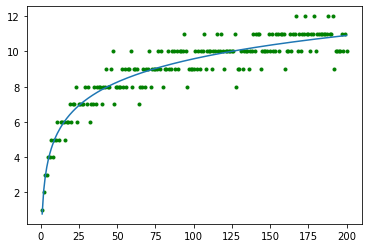

In [15]:
import pylab as plt

def get_min_len_add_chains(n):
    lens = [0]
    for i in range(2, n + 1):
        q = factor(i)[0][0]
        if n in [23, 43, 59, 77, 83, 107, 149, 163, 165, 179, 203]:
            sigma = 1
        else:
            sigma = 0
        if q == i:
            lens.append(lens[-1] + 1 - sigma)
        else:
            lens.append(min(lens[-1] + 1, lens[q - 1] + lens[i/q - 1]) - sigma)
    return [i + 1 for i in range(i)], [i + 1 for i in lens]

def plot_approximate(x, y):
    m = matrix([[sum([float((log(i))**2) for i in x]), sum([float(log(i)) for i in x])], [sum([float(log(i)) for i in x]), len(x)]])
    vec = vector([sum([float(y[i] * log(x[i])) for i in range(len(x))]), sum(y)])
    solution = m.solve_right(vec)
    plt.plot(x, [solution[0] * log(i) + solution[1] for i in x])

if __name__ == "__main__":
    ns, lens = get_min_len_add_chains(200)
    plt.scatter(ns, lens, color='g', marker='.')
    plot_approximate(ns, lens)


#### Выводы

Значения длин аддитивных цепочек аппроксимируется логарифмической кривой, что подтверждает следствие теоремы Брауэра, что значение длины аддитивной цепочки и функции логарифма эквивалентны на бесконечности, также из этого можно сделать вывод, что на бесконечности длина аддитивной цепочки будет расти очень медленно.

### 5. Проверка гипотезы Шольца - Брауэра
Гипотеза Шольца-Брауэра была проверена на алгоритме дробления индексов. Согласно гипотезе, ($l^*(2^n-1) \leq l^*(n) + n - 1$). Значения n изменялись от 2 до 10.

n | $l^*(2^n-1)$| $l^*(n) + n - 1$
-:|:-----------:|:----------------:
2 | 3           | 3
3 | 5           | 5
4 | 6           | 6
5 | 8           | 8
6 | 9           | 9
7 | 11          | 11
8 | 11          | 11
9 | 13          | 13
10| 14          | 14

#### Выводы

Для чисел $\leq 10$ гипотеза справедлива. Основываясь на этой гипотезе, можно уменьшить время работы алгоритма перебора вектора индексов, так как будет известна примерная длина аддитивной цепочки.

## Выводы по Практической работе №1

1. Были изучены и реализованы следующие методы для нахождения аддитивных цепочек для заданного числа:
1) Бинарный метод
2) Метод множителей
3) Алгоритм Брауэра
4) Алгоритм дробления вектора индексов

2. Проведена проверка следствия теоремы Брауэра

3. Проведена проверка гипотезы Шольца-Брауэра


